<center><a href="#"><img src = "https://3d-media.pro/images/Logo-DATA-For-Developpement.png" width = 250, align = "center"></a></center>

<h1 style="text-align:center;"> Project: Develop an NLP Pipeline </h1> 

<h3 style="text-align:center;">Instructor: Assan Sanogo</h3>

<h3>Project Overview:</h3>
<p>This project is based on a dataset of 7000+ essays graded by English specialists. This data problem is close to a real-world situation as it requires to be cleaned, an EDA must be thoroughly done so that the team can engineer relevant features.</p>
<p>This project is a NLP problem that will be the foundation of an English program used by the company Easy Sailing Language Training. Their ambition is to have a reliable tool to assess new students’ ability to write in English according to the IELTS grading system. In turn it would help prospective students in knowing how much time they need to invest to get to the next level.</p>

## Table of contents
* Introduction: Business Problem
* Data
    * data cleaning
    * data processing
* Methodology
* Analysis
* Results and Discussion
* Conclusion

### Introduction : 
<p><strong>DETEMLP</strong> is a project that aims to develop an end-to-end pipeline to process essays and output a grade describing the level of English proficiency. This project is based on a dataset of 7000+ essays graded by English specialists. </p>
<p>The goal is to <strong>create a reliable tool to assess new students’ ability to write in English according to the IELTS grading system</strong>. In this project, we’ll be using data processing, data cleaning, and NLP techniques, including the librairie Spacy. If during this trip we struggle with the dataset, we might reframe the problem as a classification problem.</p>
<p>Let’s dive in</p>

### Data<a name="data"></a>
<p>
Our data collection has been really simplify, here the list of our dataset : </p>
<ul>
<li>test_set.tsv</li>
<li>training_set_rel3.tsv</li>
<li>training_set_rel3.xls</li>
<li>training_set_rel3.xlsx</li>
<li>valid_sample_submission_1_column.csv</li>
<li>valid_sample_submission_1_column_no_header.csv</li>
<li>valid_sample_submission_2_column.csv</li>
<li>valid_sample_submission_5_column.csv</li>
<li>valid_set.tsv</li>
<li>valid_set.xls</li>
<li>valid_set.xlsx </li>
</ul>

<p></p>

### Data Cleaning

**import librairies and download necessary files**

**Note:** you need ton install all packages before use its. 

In [3]:
import warnings  
warnings.filterwarnings('ignore')

# import packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns
import plotly.express as px
%matplotlib inline 
# for preprocessing
from sklearn import preprocessing


# for custom transformer
from sklearn.base import BaseEstimator, TransformerMixin

# NLTK librairies
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import ngrams, pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from string import punctuation
nltk.download('omw-1.4')
nltk.download('wordnet')

from spellchecker import SpellChecker
from textblob import TextBlob
import spacy
from collections import Counter
#import language_tool_python

# sklearn librairies
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report,make_scorer, f1_score, average_precision_score, recall_score,roc_auc_score ,precision_score, confusion_matrix
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import learning_curve

# xgboost library
import xgboost as xgb
from xgboost import XGBClassifier

# plot feature importance
from xgboost import plot_importance, plot_tree

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


**Download the neccesary packages**

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

**Import the datasets**

In [5]:
# take a look to valid set
valid_set = pd.read_csv("valid_set.tsv",sep="\t",encoding="latin1")
valid_set.head()

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN
2,1790,1,"Dear Local newspaper, Have you been spending a...",1790,NaN
3,1791,1,"Dear Readers, @CAPS1 you imagine how life woul...",1791,NaN
4,1792,1,"Dear newspaper, I strongly believe that comput...",1792,NaN


**Infos into datasets**

In [6]:
valid_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   essay_id              4218 non-null   int64  
 1   essay_set             4218 non-null   int64  
 2   essay                 4218 non-null   object 
 3   domain1_predictionid  4218 non-null   int64  
 4   domain2_predictionid  600 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 164.9+ KB


In [7]:
# summary 
valid_set.describe()    

,essay_id,essay_set,domain1_predictionid,domain2_predictionid
count,4218.000000,4218.000000,4218.000000,600.000000
mean,11282.446420,4.123518,13735.433618,7178.000000
std,6173.633131,2.117188,6964.020021,346.698716
min,1788.000000,1.000000,1788.000000,6579.000000
25%,5243.250000,2.000000,7508.500000,6878.500000
50%,10995.500000,4.000000,13995.500000,7178.000000
75%,16852.750000,6.000000,19852.750000,7477.500000
max,21938.000000,8.000000,24938.000000,7777.000000


**Missing values detection**

Here are the results of the missing values detection:

- "essay_id": 0 missing values
- "essay_set": 0 missing values
- "essay": 0 missing values
- "domain1_predictionid": 0 missing values
- "domain2_predictionid": 3618 missing values

In [8]:
valid_set.isnull().sum()   

essay_id                   0
essay_set                  0
essay                      0
domain1_predictionid       0
domain2_predictionid    3618
dtype: int64

**Import training set**

In [167]:
# take a look to train set
training_set= pd.read_csv("training_set_rel3.tsv",sep="\t",encoding="latin1")
training_set.head(2)

,essay_id,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
0,1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12976 entries, 0 to 12975
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   essay_id        12976 non-null  int64  
 1   essay_set       12976 non-null  int64  
 2   essay           12976 non-null  object 
 3   rater1_domain1  12976 non-null  int64  
 4   rater2_domain1  12976 non-null  int64  
 5   rater3_domain1  128 non-null    float64
 6   domain1_score   12976 non-null  int64  
 7   rater1_domain2  1800 non-null   float64
 8   rater2_domain2  1800 non-null   float64
 9   domain2_score   1800 non-null   float64
 10  rater1_trait1   2292 non-null   float64
 11  rater1_trait2   2292 non-null   float64
 12  rater1_trait3   2292 non-null   float64
 13  rater1_trait4   2292 non-null   float64
 14  rater1_trait5   723 non-null    float64
 15  rater1_trait6   723 non-null    float64
 16  rater2_trait1   2292 non-null   float64
 17  rater2_trait2   2292 non-null  

**Missing values**

In [11]:
training_set.isnull().sum()   

essay_id              0
essay_set             0
essay                 0
rater1_domain1        0
rater2_domain1        0
rater3_domain1    12848
domain1_score         0
rater1_domain2    11176
rater2_domain2    11176
domain2_score     11176
rater1_trait1     10684
rater1_trait2     10684
rater1_trait3     10684
rater1_trait4     10684
rater1_trait5     12253
rater1_trait6     12253
rater2_trait1     10684
rater2_trait2     10684
rater2_trait3     10684
rater2_trait4     10684
rater2_trait5     12253
rater2_trait6     12253
rater3_trait1     12848
rater3_trait2     12848
rater3_trait3     12848
rater3_trait4     12848
rater3_trait5     12848
rater3_trait6     12848
dtype: int64

**Valid sample submission**

A "valid dataset test" typically refers to a dataset that is used specifically for testing the performance and generalization ability of a machine learning model

In [12]:
# valid sample submission
sample_submission = pd.read_csv("valid_sample_submission_5_column.csv",encoding="latin1")
sample_submission.head()

,prediction_id,essay_id,essay_set,essay_weight,predicted_score
0,1788,1788,1,1.0,7
1,1789,1789,1,1.0,8
2,1790,1790,1,1.0,9
3,1791,1791,1,1.0,9
4,1792,1792,1,1.0,9


In [13]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4818 entries, 0 to 4817
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   prediction_id    4818 non-null   int64  
 1   essay_id         4818 non-null   int64  
 2   essay_set        4818 non-null   int64  
 3   essay_weight     4818 non-null   float64
 4   predicted_score  4818 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 188.3 KB


In [14]:
sample_submission.describe()

,prediction_id,essay_id,essay_set,essay_weight,predicted_score
count,4818.000000,4818.000000,4818.00000,4818.000000,4818.000000
mean,12918.816729,10509.725820,3.85907,0.875467,6.240764
std,6867.367811,6129.318271,2.10140,0.216259,8.308969
min,1788.000000,1788.000000,1.00000,0.500000,0.000000
25%,7193.250000,5085.250000,2.00000,1.000000,2.000000
50%,13694.500000,10694.500000,4.00000,1.000000,3.000000
75%,19702.750000,16702.750000,6.00000,1.000000,7.000000
max,24938.000000,21938.000000,8.00000,1.000000,50.000000


In [15]:
sample_submission.isnull().sum()    # no missing values 

prediction_id      0
essay_id           0
essay_set          0
essay_weight       0
predicted_score    0
dtype: int64

### Missing values

In [168]:
# function to check missing values
def Missing_values(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total,percent], axis=1, keys=['Total', 'Pourcentage'])
    #Affiche que les variables avec des na
    print(missing_data[(percent>0)],'\n' )

In [169]:
# % Missing values for the dataset for each column
Missing_values(training_set)

                Total  Pourcentage
rater3_trait6   12848     0.990136
rater3_trait5   12848     0.990136
rater3_trait4   12848     0.990136
rater3_trait3   12848     0.990136
rater3_domain1  12848     0.990136
rater3_trait2   12848     0.990136
rater3_trait1   12848     0.990136
rater1_trait6   12253     0.944282
rater2_trait6   12253     0.944282
rater2_trait5   12253     0.944282
rater1_trait5   12253     0.944282
rater1_domain2  11176     0.861282
rater2_domain2  11176     0.861282
domain2_score   11176     0.861282
rater1_trait2   10684     0.823366
rater2_trait3   10684     0.823366
rater1_trait3   10684     0.823366
rater2_trait4   10684     0.823366
rater2_trait2   10684     0.823366
rater2_trait1   10684     0.823366
rater1_trait1   10684     0.823366
rater1_trait4   10684     0.823366 



The percentage of missing values is very high for many variables, exceeding even 80 percent. Therefore, we will delete these variables, as the proportion is very high."

In [170]:
training_set.drop(columns=['rater1_domain1','rater2_domain1','rater3_domain1',
       'rater1_domain2', 'rater2_domain2', 'domain2_score', 'rater1_trait1',
       'rater1_trait2', 'rater1_trait3', 'rater1_trait4', 'rater1_trait5',
       'rater1_trait6', 'rater2_trait1', 'rater2_trait2', 'rater2_trait3',
       'rater2_trait4', 'rater2_trait5', 'rater2_trait6', 'rater3_trait1',
       'rater3_trait2', 'rater3_trait3', 'rater3_trait4', 'rater3_trait5',
       'rater3_trait6'], axis=1, inplace=True)

In [171]:
training_set.head(2)

,essay_id,essay_set,essay,domain1_score
0,1,1,"Dear local newspaper, I think effects computer...",8
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9


### SKEWNESS

The code uses the displot function from the Seaborn library (sns) to create a distribution plot of the 'domain1_score' column in the DataFrame training_set before and after normalization. Here's a breakdown of what each part of the code does:

- sns.displot: This is a function from the Seaborn library used to create distribution plots.
- training_set **domain1_score**: This specifies the column 'domain1_score' from the DataFrame training_set.
- kde=True: This parameter specifies that the plot should include a kernel density estimation (KDE) plot, which provides a smoothed estimate of the probability density function of the data.

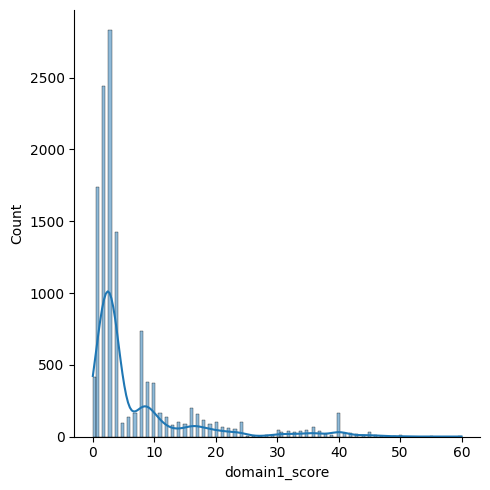

In [172]:
#Check Skewness before normalization
sns.displot(training_set['domain1_score'], kde=True)
plt.show()

In [173]:
# function to normalize the score
def normalizer(training_set, domain1_score):
    min_values = training_set.groupby('essay_set')[domain1_score].min()
    max_values = training_set.groupby('essay_set')[domain1_score].max()
    training_set['normalized_score'] = training_set.apply(lambda row: (row[domain1_score] - min_values[row['essay_set']]) / (max_values[row['essay_set']] - min_values[row['essay_set']]), axis=1)
    return training_set

In [174]:
#Apply the Function normalizer to training set
training_set = (training_set.groupby('essay_set', group_keys=False, as_index=False).apply(lambda group: normalizer(group, 'domain1_score')))
training_set.head(2)

,essay_id,essay_set,essay,domain1_score,normalized_score
0,1,1,"Dear local newspaper, I think effects computer...",8,0.6
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.7


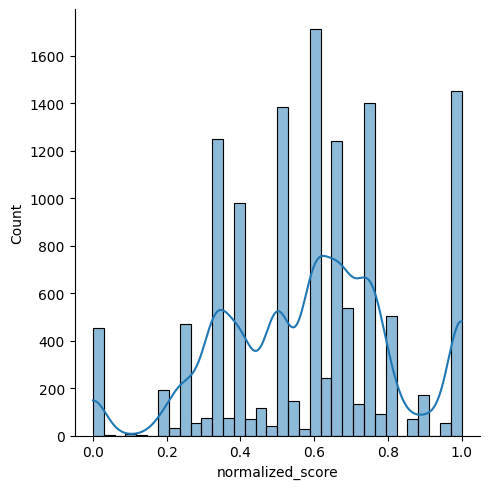

In [175]:
#Check Skew after normalization
sns.displot(training_set['normalized_score'], kde=True)
plt.show()

In [176]:
#show the descriptive statistics of the normalized_score and domain1_score
training_set[['domain1_score', 'normalized_score']].describe().round(3)

,domain1_score,normalized_score
count,12976.000,12976.000
mean,6.800,0.589
std,8.971,0.240
min,0.000,0.000
25%,2.000,0.400
50%,3.000,0.600
75%,8.000,0.750
max,60.000,1.000


#### Normalization interpretation 
- Before applying the normalization, We observe a high frequency of lower scores, particularly between 0 and 10.
- After applying the normalization,the plot displays multiple peaks, indicating various concentrations of normalized scores. The scores are spread across a more diverse range allowing for better comparison and analysis.
In summary,The spread of scores is more consistent after normalization

In [177]:
# check info on our dataset
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12976 entries, 0 to 12975
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   essay_id          12976 non-null  int64  
 1   essay_set         12976 non-null  int64  
 2   essay             12976 non-null  object 
 3   domain1_score     12976 non-null  int64  
 4   normalized_score  12976 non-null  float64
dtypes: float64(1), int64(3), object(1)
memory usage: 608.2+ KB


#### Univariate Analysis
Through the below training_set analysis it can be seen that there is an uneven distribution of 2 observations : "the number of each score" and "the number of each essay". we will show it by plotting the distribution of each observation. 

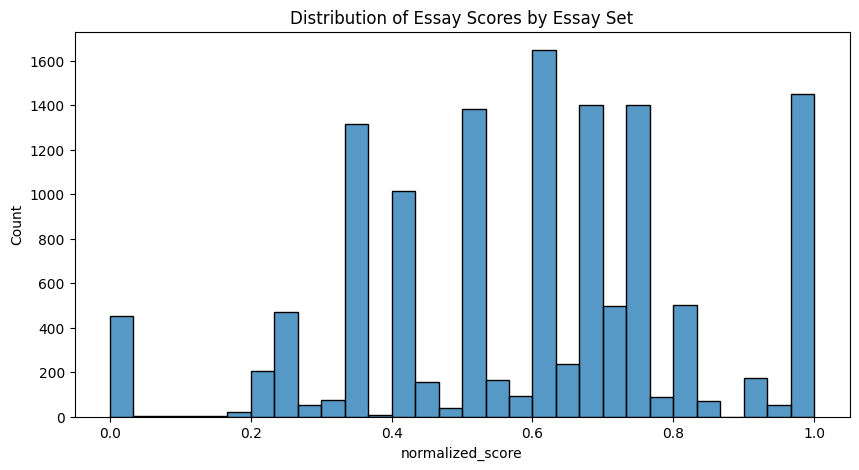

In [178]:
# The below code generates a visually appealing count plot to showcase the 
      # display the distribution of the number of essay for each score
plt.figure(figsize=(10,5))
sns.histplot(data=training_set, x='normalized_score', bins=30)
plt.title('Distribution of Essay Scores by Essay Set')
plt.show()

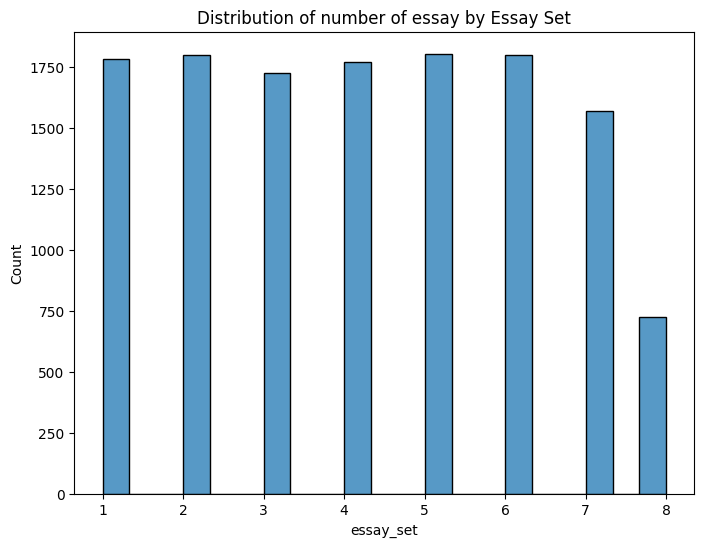

In [179]:
# The below code generates a visually appealing count plot to showcase the 
        # display the distribution of number of essay for each essay_set
plt.figure(figsize=(8, 6))
sns.histplot(training_set, x='essay_set')
plt.title('Distribution of number of essay by Essay Set')
plt.show()

We can see that we have an imbalanced training_set.

## Data Preprocessing

First, we need to preprocess the texts and remove mentions, punctuation, stop words, links to websites, non-alphanumeric characters, single characters, and extra spaces. Here, we will use the built-in TweetTokenizer in NLTK to tokenize the sentence.

- Cleaning the text: In this step, we need to remove special characters and numbers from the text. We can use the expand function, which will replace short English notations with the full form and remove special characters, numbers from the text, etc.

- Removing stop words: Stop words are very common words that usually do not carry specific meaning in the context of text analysis. In French, examples of stop words could be "the", "and", etc. Stop words are often excluded when indexing or searching text.

- Preprocessing: The preprocess_text function cleans the data by removing stop words and applying other necessary transformations.

Then, compute some features to measure the quality of a text.


In [180]:
def expand(sent):
    "This function will replace english short notations with full form"
    
    sent=re.sub(r"can't", "can not",sent)
    sent=re.sub(r"won't", "will not",sent)
    sent=re.sub(r"n\'t", " not",sent)
    sent=re.sub(r"\'re", " are",sent)
    sent=re.sub(r"\'m"," am",sent)
    sent=re.sub(r"\'s"," is",sent)
    sent=re.sub(r"\'ll"," will",sent)
    sent=re.sub(r"\'ve"," have",sent)
    sent=re.sub(r"\'d"," would",sent)
    sent=re.sub(r"\'t", " not",sent)
    
    return sent
    
# Create a stop word list    
stopword= stopwords.words('english')



def preprocess_text(text, stopwords): # text :, stopword = stopword
    "function for preprocess the text data"
    
    preprocessed_text=[]
    
    for sentence in text:
        sent=expand(sentence) # use the spand function
        sent=sent.replace("\\r"," ")
        sent=sent.replace("\\n"," ")
        sent=sent.replace('\\"'," ")
        sent=re.sub("[^A-Za-z0-9]+"," ",sent)
        
        #
        sent=" ".join(i for i in sent.split() if i.lower() not in stopword)
        preprocessed_text.append(sent.lower().strip())
        
    return preprocessed_text # after pre-processing

In [181]:
training_set['essay_text'] = preprocess_text(training_set['essay'], stopwords=stopword)

In [182]:
training_set.head(2)

,essay_id,essay_set,essay,domain1_score,normalized_score,essay_text
0,1,1,"Dear local newspaper, I think effects computer...",8,0.6,dear local newspaper think effects computers p...
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.7,dear caps1 caps2 believe using computers benef...


**Lemmatization:** Lemmatization is a natural language processing process that aims to reduce words to their base form, called lemma. The lemma is the canonical form of a word that represents its main meaning. For example, the lemmas of the words "work", "works", and "worked" are all "work"

In [183]:
lemmatizer = WordNetLemmatizer()


# Function to lemmatize a sentence
def lemmatize_sentence(sentence):
    words = sentence.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    lemmatized_sentence = ' '.join(lemmatized_words)
    return lemmatized_sentence

# Apply lemmatization to the 'text' column
training_set['essay_text'] = training_set['essay_text'].apply(lemmatize_sentence)
training_set.head(2)

,essay_id,essay_set,essay,domain1_score,normalized_score,essay_text
0,1,1,"Dear local newspaper, I think effects computer...",8,0.6,dear local newspaper think effect computer peo...
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.7,dear caps1 caps2 believe using computer benefi...


In [184]:
# The below code is a function computing text complexity based on words and word structure
def readability_indices(text):
    """
    This function will return a dictionary containing various readability indices
    calculated from the given text.
   
    """
    indices = {}
 
    # Flesch reading ease
    indices['flesch_reading_ease'] = 206.835 - 1.015*(len(text.split())/len(text.split())-1.015*len(text.split()))-84.6*(len(text.split())/len(text.split()))
 
    # Flesch-Kincaid Grade Level
    indices['flesch_kincaid_grade'] = 0.39*(len(text.split())/len(text.split()))+11.8*(len(text.split())/len(text.split()))-15.59
 
    # Gunning Fog Index
    indices['gunning_fog'] = 0.4*((len(text.split())/len(text.split()))+100*(len(text.split())/len(text.split())))
 
    # SMOG Index
    indices['smog_index'] = 1.0430*(30*(len(text.split())/len(text.split())))+3.1291
 
    # Automated Readability Index
    indices['ari_index'] = 4.71*(len(text.split())/len(text.split()))+0.5*(len(text.split())/len(text.split()))-21.43
 
    # Coleman-Liau Index
    indices['coleman_liau_index'] = 5.89*(len(text)/len(text.split()))-29.6*(len(text)/len(text.split()))-15.8
 
    # LIX Readability Index
    indices['lix_index'] = len(text.split())/len(text.split())+(100*(len(text.split())/len(text.split())))
 
    # RIX Readability Index
    indices['rix_index'] = len(text.split())/len(text.split())
 
    return indices
 


In [185]:
# Apply the readability_indices function to the 'essay_text' column and create a new column for each indices
training_set = pd.concat([training_set, training_set['essay_text'].apply(readability_indices).apply(pd.Series)], axis=1)
 
training_set.head(2)

,essay_id,essay_set,essay,domain1_score,normalized_score,essay_text,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,ari_index,coleman_liau_index,lix_index,rix_index
0,1,1,"Dear local newspaper, I think effects computer...",8,0.6,dear local newspaper think effect computer peo...,292.237350,-3.4,40.4,34.4191,-16.22,-169.058012,101.0,1.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.7,dear caps1 caps2 believe using computer benefi...,353.020625,-3.4,40.4,34.4191,-16.22,-168.703156,101.0,1.0


In [186]:
# The below code is a function computing text Complexity by measuring lexical features

def lexical_features(text):
    """
    This function will return a dictionary containing various lexical features
    calculated from the given text.
    """
    features = {}
 
    # Number of words
    features['word_count'] = len(text.split())
 
    # Number of characters
    features['char_count'] = len(text)
 
    # Average word length
    features['avg_word_length'] = sum(len(word) for word in text.split())/len(text.split())
 
    # Number of sentences
    features['sentence_count'] = len(sent_tokenize(text))
 
    # Average sentence length
    features['avg_sentence_length'] = features['word_count']/features['sentence_count']
 
    # Number of syllables
    features['syllable_count'] = sum(len(list(y for y in x if y in 'aeiou')) for x in text.split())
 
    return features

In [187]:
# Apply the lexical_features function to the 'essay_text' column and create a new column for each indices
training_set = pd.concat([training_set, training_set['essay_text'].apply(lexical_features).apply(pd.Series)], axis=1)
 
training_set.head(2)

,essay_id,essay_set,essay,domain1_score,normalized_score,essay_text,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,ari_index,coleman_liau_index,lix_index,rix_index,word_count,char_count,avg_word_length,sentence_count,avg_sentence_length,syllable_count
0,1,1,"Dear local newspaper, I think effects computer...",8,0.6,dear local newspaper think effect computer peo...,292.237350,-3.4,40.4,34.4191,-16.22,-169.058012,101.0,1.0,166.0,1073.0,5.469880,1.0,166.0,333.0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.7,dear caps1 caps2 believe using computer benefi...,353.020625,-3.4,40.4,34.4191,-16.22,-168.703156,101.0,1.0,225.0,1451.0,5.453333,1.0,225.0,480.0


In [188]:
# The below code is a function computing text Complexity via the syntactic structure of the sentences

def syntactic_features(text):
    """
    This function will return a dictionary containing various syntactic features
    calculated from the given text.
    """
    features = {}
 
    # Part-of-speech tagging
    pos_tags = pos_tag(word_tokenize(text))
 
    # Number of nouns
    features['noun_count'] = len([word for word, pos in pos_tags if pos in ['NN', 'NNS', 'NNP', 'NNPS']])
 
    # Number of verbs
    features['verb_count'] = len([word for word, pos in pos_tags if pos in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']])
 
    # Number of adjectives
    features['adj_count'] = len([word for word, pos in pos_tags if pos in ['JJ', 'JJR', 'JJS']])
 
    # Number of adverbs
    features['adv_count'] = len([word for word, pos in pos_tags if pos in ['RB', 'RBR', 'RBS']])
 
    # Number of pronouns
    features['pron_count'] = len([word for word, pos in pos_tags if pos in ['PRP', 'PRP$', 'WP', 'WP$']])
 
    # Number of prepositions
    features['prep_count'] = len([word for word, pos in pos_tags if pos in ['IN']])
 
    # Number of interjections
    features['interj_count'] = len([word for word, pos in pos_tags if pos in ['UH']])
 
    # Roots of Sentence trees
    features['root_count'] = len([word for word, pos in pos_tags if pos in ['ROOT']])
 
    # Length of Sentence trees
    features['tree_length'] = len([word for word, pos in pos_tags if pos in ['TREE']])
 
    # Average number of Connections of Sentence tree at the root level
    if features['root_count'] != 0:
        features['avg_tree_connections'] = features['tree_length'] / features['root_count']
    else:
        features['avg_tree_connections'] = 0  # Or any value you prefer when the root count is zero
 
    # Length of clauses
    features['clause_length'] = len([word for word, pos in pos_tags if pos in ['CLAUSE']])
 
    return features

In [189]:
# Apply the lexical_features function to the 'essay_text' column and create a new column for each indices
training_set = pd.concat([training_set, training_set['essay_text'].apply(syntactic_features).apply(pd.Series)], axis=1)
 
training_set.head(2)

,essay_id,essay_set,essay,domain1_score,normalized_score,essay_text,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,...,verb_count,adj_count,adv_count,pron_count,prep_count,interj_count,root_count,tree_length,avg_tree_connections,clause_length
0,1,1,"Dear local newspaper, I think effects computer...",8,0.6,dear local newspaper think effect computer peo...,292.237350,-3.4,40.4,34.4191,...,40,32,11,4,1,0,0,0,0,0
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.7,dear caps1 caps2 believe using computer benefi...,353.020625,-3.4,40.4,34.4191,...,56,29,9,0,7,0,0,0,0,0


In [64]:
# The below code is a function computing text quality via the spelling and grammar of the sentences
def quality_features(text):
    """
    This function will return a dictionary containing various quality features
    calculated from the given text.
    """
    features = {}
 
    # Misspelling score
    spell = SpellChecker()
    misspelled = spell.unknown(text.split())
    features['misspelled_count'] = len(misspelled)
 
    return features

In [190]:
# Apply the lexical_features function to the 'quality_features' column and create a new column for each indices
training_set = pd.concat([training_set, training_set['essay_text'].apply(quality_features).apply(pd.Series)], axis=1)
 
training_set.head(2)

,essay_id,essay_set,essay,domain1_score,normalized_score,essay_text,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,...,adj_count,adv_count,pron_count,prep_count,interj_count,root_count,tree_length,avg_tree_connections,clause_length,misspelled_count
0,1,1,"Dear local newspaper, I think effects computer...",8,0.6,dear local newspaper think effect computer peo...,292.237350,-3.4,40.4,34.4191,...,32,11,4,1,0,0,0,0,0,15
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.7,dear caps1 caps2 believe using computer benefi...,353.020625,-3.4,40.4,34.4191,...,29,9,0,7,0,0,0,0,0,23


## CORRELATION MATRIX ##

We plot the correlation matrix with respect of each essay to understand the relationships between variables in the training_set.

In [206]:
# Show new training set
training_set.head(2)

,essay_id,essay_set,essay,domain1_score,normalized_score,essay_text,flesch_reading_ease,flesch_kincaid_grade,gunning_fog,smog_index,...,adj_count,adv_count,pron_count,prep_count,interj_count,root_count,tree_length,avg_tree_connections,clause_length,misspelled_count
0,1,1,"Dear local newspaper, I think effects computer...",8,0.6,dear local newspaper think effect computer peo...,292.237350,-3.4,40.4,34.4191,...,32,11,4,1,0,0,0,0,0,15
1,2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9,0.7,dear caps1 caps2 believe using computer benefi...,353.020625,-3.4,40.4,34.4191,...,29,9,0,7,0,0,0,0,0,23


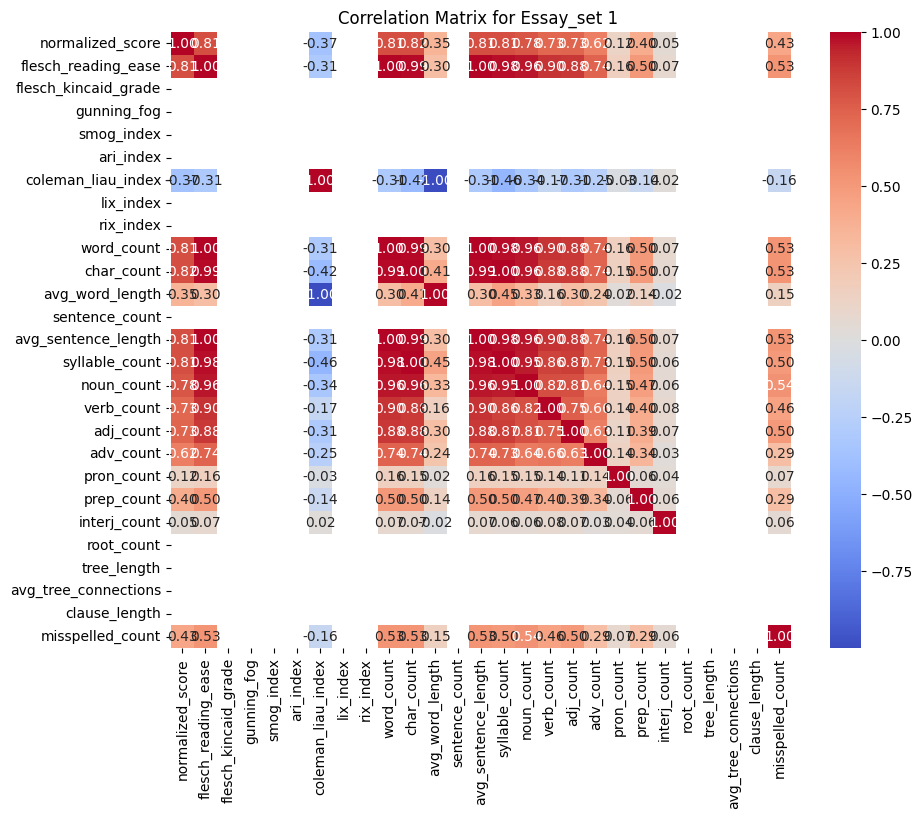

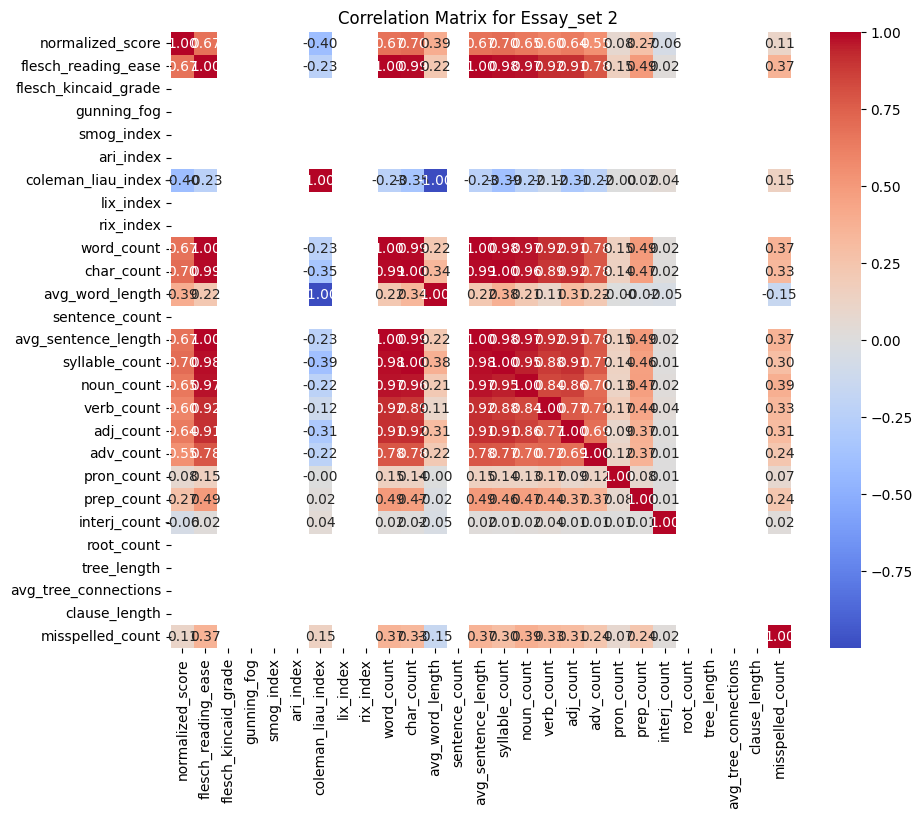

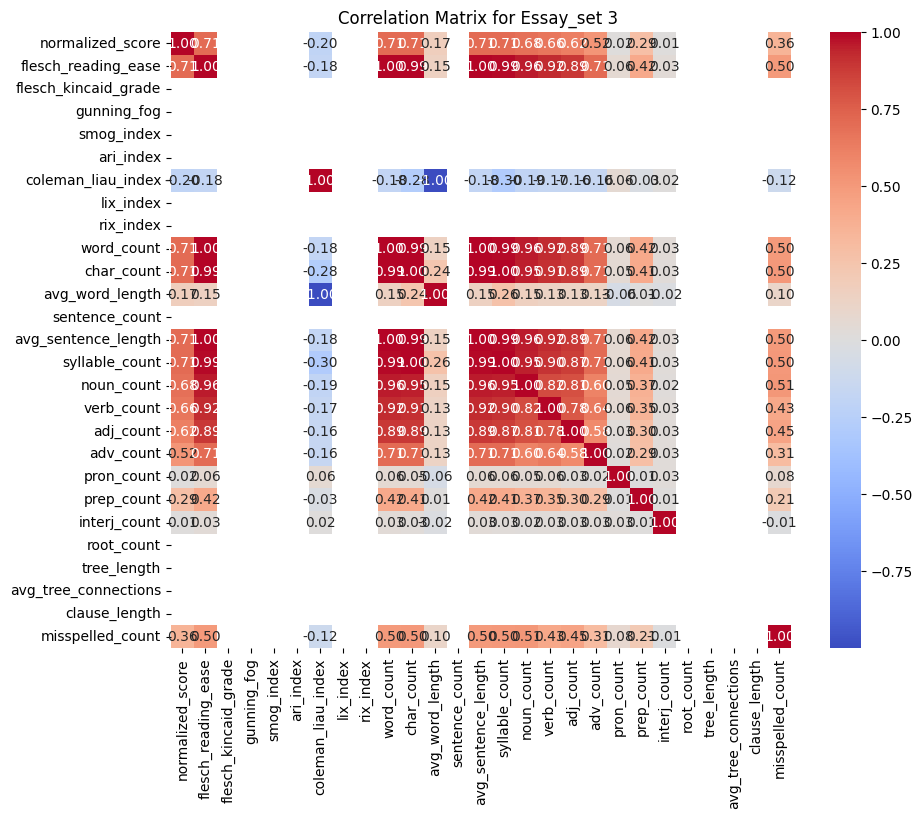

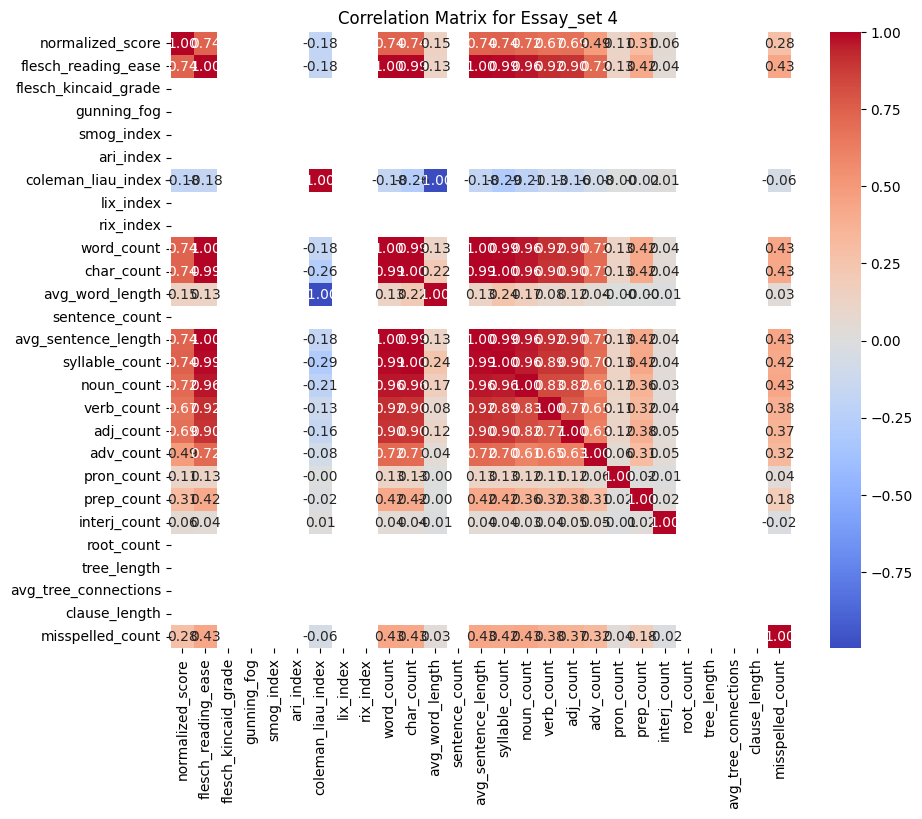

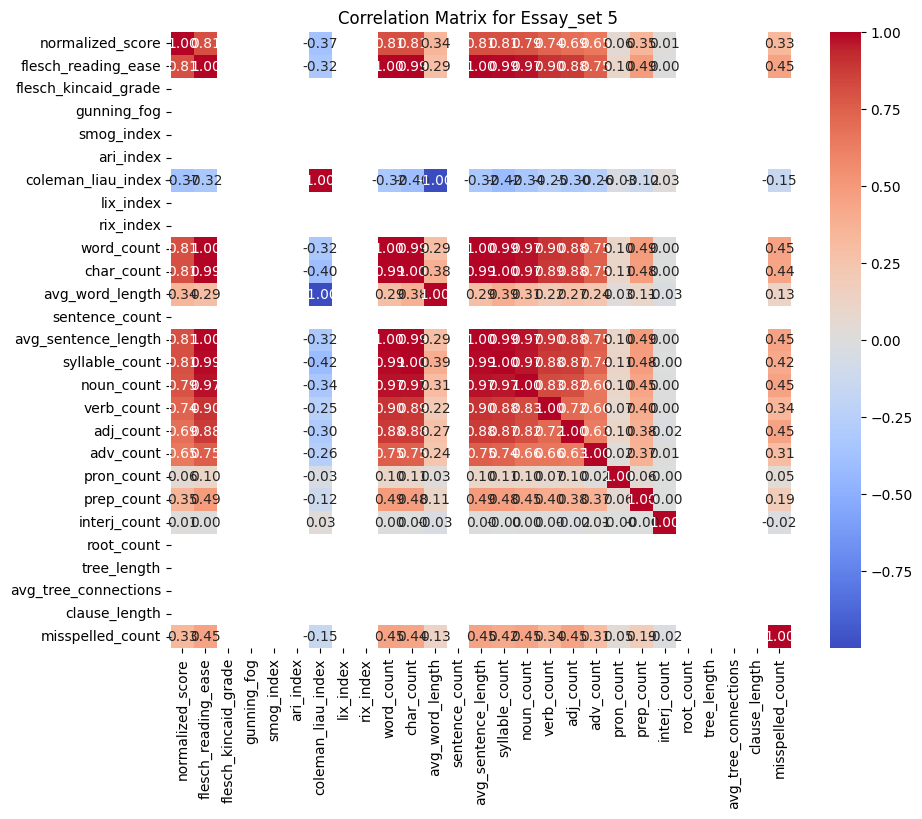

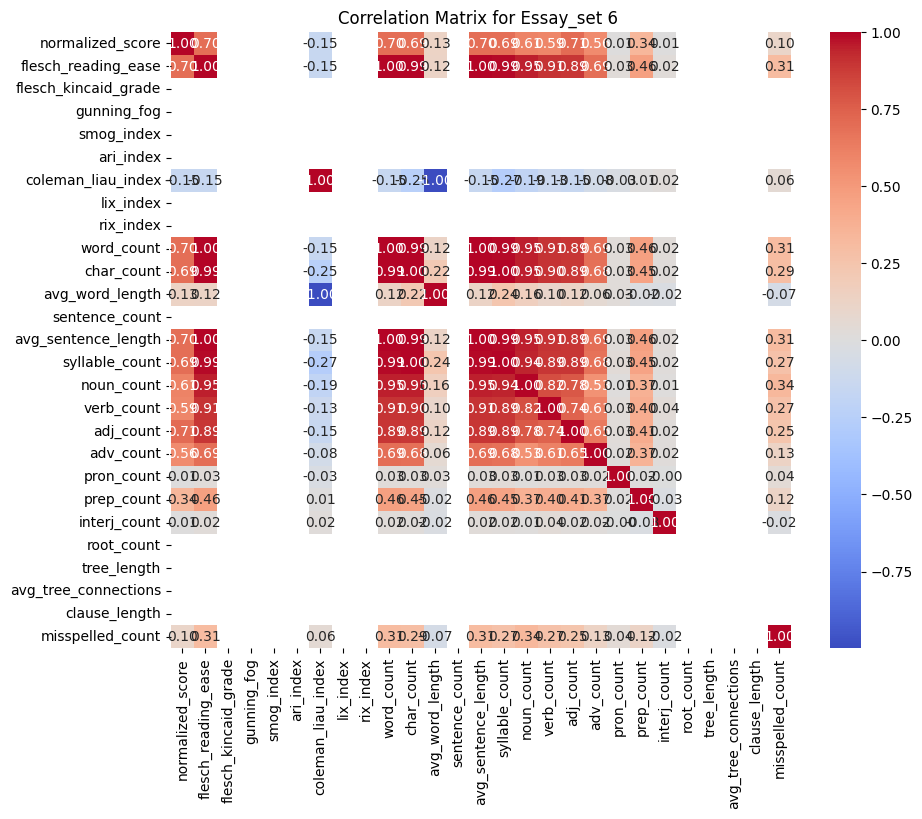

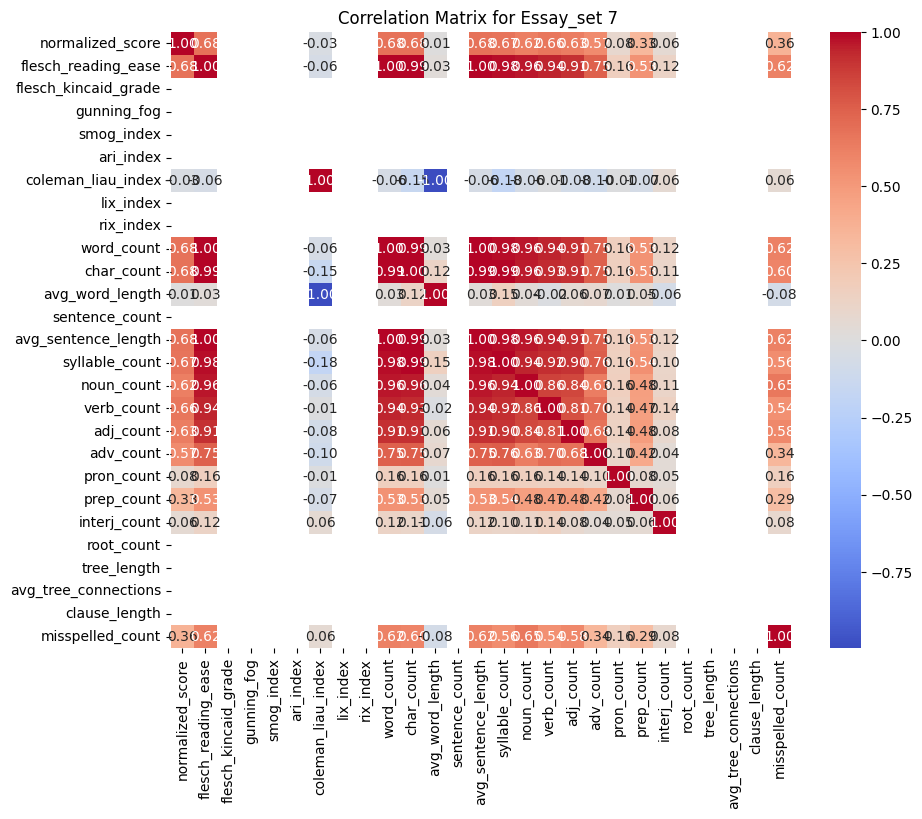

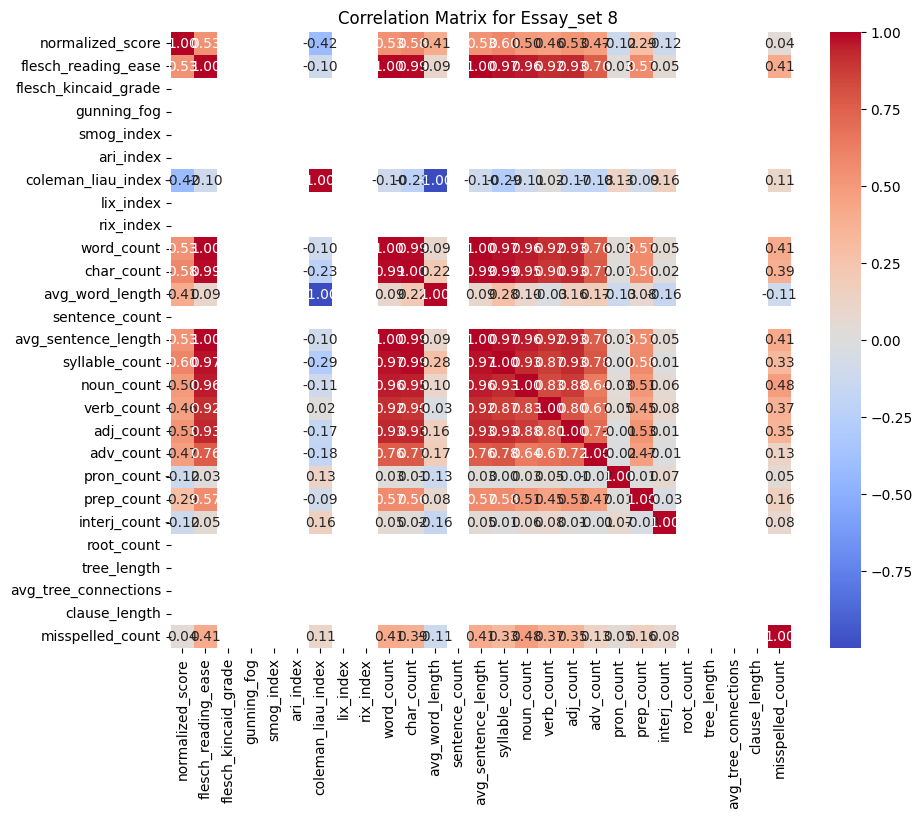

In [208]:
# plot the correlation matrix for each essay set
essay_types = training_set['essay_set'].unique()
essay_dfs = {essay_type: training_set[training_set['essay_set'] == essay_type] for essay_type in essay_types}
for essay_type, essay_df in essay_dfs.items():
    # Get the selected columns including 'normalized_score' and columns from 'flesch_reading_ease' onwards
    selected_columns = ['normalized_score'] + essay_df.iloc[:,6:].columns.tolist()
    corr_matrix = essay_df[selected_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'Correlation Matrix for Essay_set {essay_type} ')
    plt.show()

<IMBALANCED DATA SET>

## Building a Classification model with some classifier (machine learning models) ##

  ### LET' BUILD OUR DATASET 

#### Let's build our valid_set
We will apply all process applied to the training_set to the valid_set.

- First, we will merge the valid_set with the sample_submission in order to get the score of each essay
- second, we will apply the function normalizer to normalize the different score to get a column normalized_score
- third we will apply on column essay all functions used during the preprocessing step to get a column essay_text

In [209]:
# Merge the valid set with the sample submission
valid_set= pd.merge(valid_set,sample_submission[['prediction_id','predicted_score']], left_on='domain1_predictionid', right_on='prediction_id')
valid_set.head(2)

,essay_id,essay_set,essay,domain1_predictionid,domain2_predictionid,prediction_id,predicted_score
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",1788,NaN,1788,7
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,1789,NaN,1789,8


In [211]:
valid_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4218 entries, 0 to 4217
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   essay_id              4218 non-null   int64  
 1   essay_set             4218 non-null   int64  
 2   essay                 4218 non-null   object 
 3   domain1_predictionid  4218 non-null   int64  
 4   domain2_predictionid  600 non-null    float64
 5   prediction_id         4218 non-null   int64  
 6   predicted_score       4218 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 230.8+ KB


In [212]:
# drop  useless column
valid_s= valid_set.drop(columns=["domain2_predictionid","domain1_predictionid",'prediction_id'], axis=1, inplace=True)

In [213]:
valid_set.head(2)

,essay_id,essay_set,essay,predicted_score
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",7
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,8


In [214]:
# apply the normalizer function to the valid set (1)
def normalizer1(valid_set, column_name):
    min_values = valid_set.groupby('essay_set')[column_name].min()
    max_values = valid_set.groupby('essay_set')[column_name].max()
    valid_set['normalized_score'] = valid_set.apply(lambda row: (row[column_name] - min_values[row['essay_set']]) / (max_values[row['essay_set']] - min_values[row['essay_set']]), axis=1)
    return valid_set

In [215]:
#apply the normalizer function to the valid set (2)
valid_set = (valid_set.groupby('essay_set', group_keys=False, as_index=False).apply(lambda group: normalizer(group, 'predicted_score')))

In [216]:
#Apply all the preprocessing steps to the valid set
valid_set['essay_text'] = preprocess_text(valid_set['essay'], stopwords=stopword)

In [217]:
#lemmatize the 'text' column
valid_set['essay_text'] = valid_set['essay_text'].apply(lemmatize_sentence)
valid_set.head(2)

,essay_id,essay_set,essay,predicted_score,normalized_score,essay_text
0,1788,1,"Dear @ORGANIZATION1, @CAPS1 more and more peop...",7,0.5,dear organization1 caps1 people start use comp...
1,1789,1,Dear @LOCATION1 Time @CAPS1 me tell you what I...,8,0.6,dear location1 time caps1 tell think computer ...


In [ ]:
# Apply all all functions used during the preprocessing step to get a column essay_text
    # Apply the readability_indices function to the 'essay_text' column and create a new column for each indices
valid_set = pd.concat([valid_set, valid_set['essay_text'].apply(readability_indices).apply(pd.Series)], axis=1)

In [ ]:
# Apply all all functions used during the preprocessing step to get a column essay_text
    # Apply the lexical_features function to the 'essay_text' column and create a new column for each indices
valid_set = pd.concat([valid_set, valid_set['essay_text'].apply(lexical_features).apply(pd.Series)], axis=1)

In [ ]:
# Apply all all functions used during the preprocessing step to get a column essay_text
    # Apply the syntactic_features function to the 'essay_text' column and create a new column for each indices
valid_set = pd.concat([valid_set, valid_set['essay_text'].apply(syntactic_features).apply(pd.Series)], axis=1)

In [ ]:
# Apply all all functions used during the preprocessing step to get a column essay_text
    # Apply the quality_features function to the 'essay_text' column and create a new column for each indices
valid_set = pd.concat([valid_set, valid_set['essay_text'].apply(quality_features).apply(pd.Series)], axis=1)

In [ ]:
valid_set.head(2)

#### ASSIGN THE LEVEL OF ENGLISH


This code defines two functions. The first function, assign_level, takes a score and the essay set number as input and assigns an English level based on the score and essay set. The second function, classify_levels, adds a new level column to a given DataFrame using the assign_level function to compute the levels for each row based on the specified scores and essay sets.
The "level" will be our target variable.

In [203]:
# Function to assign the target variable to our dataset
def Eng_level(data_frame, column_name):
    # Group the DataFrame by 'essay_set' and calculate the mean and std for each group
    group_stats = data_frame.groupby('essay_set')[column_name].agg(['mean', 'std'])
    
    # Define the level function using group statistics
    def level(row):
        essay_set = row['essay_set']
        score = row[column_name]
        mean = group_stats.loc[essay_set, 'mean']
        std = group_stats.loc[essay_set, 'std']
        if score <= mean - std:
            return 0
        elif score >= mean + std:
            return 2
        else: 
            return 1

    return level


In [204]:
# Apply the Eng_level function to the training_set and the valid set
training_set = Eng_level(training_set, 'normalized_score')
valid_set = Eng_level(valid_set, 'normalized_score')

In [205]:
data.level.unique()

array([1, 0, 2], dtype=int64)

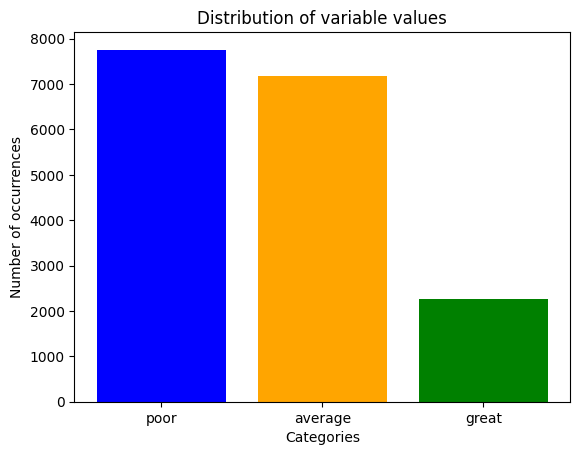

In [206]:
class_names = ['poor','average','great']
counts = [len(data.level[data.level == val]) for val in data.level.unique()]

# Plot the diagram
plt.bar(class_names, counts, color=['blue', 'orange', 'green'])

# Add titles and labels
plt.title("Distribution of variable values")
plt.xlabel("Categories")
plt.ylabel("Number of occurrences")

# Show the diagram
plt.show()

#### Building data with the features selected
As we saw earlier, we've selected 12 features to measure the quality of an English essay. We will now use these features to build our dataset by applying the compute function 


In [113]:
#Features selection
# Select the features that are highly correlated with the target column

def compute_best_features(text):
    """
    Computes a series of strong linguistic features from a given text.
   
    """
 
    # Preparation
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    word_counts = Counter(words)
    spell = SpellChecker()
    misspelled = spell.unknown(words)
 
    # 1. Text Length
    text_length = len(text)
 
    # 2. Number of Sentences
    num_sentences = len(sentences)
 
    # 3. Number of Words
    num_words = len(words)
 
    # 4. Number of Unique Words
    num_unique_words = len(set(words))
 
    # 5. Function Word Frequency
    function_words = set(stopwords.words('english'))
    function_word_frequency = sum(word_counts[word] for word in function_words)
 
    # 6. Content Word Frequency
    content_words = set(words) - function_words
    content_word_frequency = sum(word_counts[word] for word in content_words)
 
    # 7. Punctuation Frequency
    punctuation_marks = {'.', ',', '!', '?', ':', ';', '-', '(', ')', '[', ']', '{', '}', '"', "'"}
    punctuation_frequency = sum(text.count(mark) for mark in punctuation_marks)
 
    # 8. Past Tense Verb Frequency
    past_tense_verb_frequency = sum(1 for word, pos in pos_tag(words) if pos == 'VBD')
 
    # 9. Present Tense Verb Frequency
    present_tense_verb_frequency = sum(1 for word, pos in pos_tag(words) if pos in ('VB', 'VBG', 'VBP', 'VBZ'))
 
    # 10. Adjective Frequency
    tagged = pos_tag(word_tokenize(text))
    adjective_frequency = sum(1 for word, pos in tagged if pos == 'JJ')
 
    # 11. Determiner Frequency
    tagged_df = pos_tag(word_tokenize(text))
    determiner_frequency = sum(1 for word, pos in tagged_df if pos == 'DT')
 
    # 12. Preposition Frequency
    tagged_pf = pos_tag(word_tokenize(text))
    preposition_frequency = sum(1 for word, pos in tagged_pf if pos == 'IN')
 
    return {
        'text_length': text_length,
        'num_sentences': num_sentences,
        'num_words': num_words,
        'num_unique_words': num_unique_words,
        'function_word_frequency': function_word_frequency,
        'content_word_frequency': content_word_frequency,
        'punctuation_frequency': punctuation_frequency,
        'past_tense_verb_frequency': past_tense_verb_frequency,
        'present_tense_verb_frequency': present_tense_verb_frequency,
        'adjective_frequency': adjective_frequency,
        'determiner_frequency' : determiner_frequency,
        'preposition_frequency' : preposition_frequency,
 
    }

In [207]:
# Divide the data into groups based on the 'level' variable
groups = data.groupby('level')


In [208]:
groups.describe()

essay_id                                                               \
         count          mean          std   min      25%      50%       75%   
level                                                                         
0       7172.0  11264.978109  5884.574631   3.0  6366.50  10946.5  15939.50   
1       7758.0   9593.358726  6779.687507   1.0  3291.25   9107.0  15873.75   
2       2264.0  11468.513693  5265.921717  16.0  7427.00  11966.5  15931.50   

               essay_set            ... domain1_score       normalized_score  \
           max     count      mean  ...           75%   max            count   
level                               ...                                        
0      21937.0    7172.0  4.419548  ...           3.0  39.0           7172.0   
1      21938.0    7758.0  3.841067  ...           9.0  50.0           7758.0   
2      21874.0    2264.0  4.474382  ...           4.0  60.0           2264.0   

                                                                     
           mean       std   min       25%       50%   75%       max  
level                                                                
0      0.371871  0.143346  0.00  0.333333  0.400000  0.50  0.590909  
1      0.689470  0.066367  0.60  0.636364  0.666667  0.75  0.818182  
2      0.983544  0.039086  0.85  1.000000  1.000000  1.00  1.000000  

[3 rows x 32 columns]

In [209]:
# Sample a specific number of observations from each group
data_tr = groups.apply(lambda x: x.sample(2264))

# Reset the index of the sampled subset of data
data_tr.reset_index(drop=True, inplace=True)

In [210]:
# apply the function to the training set
data_t = data_tr['essay_text'].apply((lambda x: pd.Series(compute_best_features(x))))

In [211]:
data_tr.level.unique()

array([0, 1, 2], dtype=int64)

In [212]:
for col in data_t.columns:
    data_tr[col] = data_t[col]

In [213]:
data_tr.head(2)

,essay_id,essay_set,essay,domain1_score,normalized_score,essay_text,level,text_length,num_sentences,num_words,num_unique_words,function_word_frequency,content_word_frequency,punctuation_frequency,past_tense_verb_frequency,present_tense_verb_frequency,adjective_frequency,determiner_frequency,preposition_frequency
0,12445,5,Narciso was happy and grateful. He was proud o...,1,0.250000,narciso happy grateful proud parent parent lef...,0,267,1,44,37,0,44,0,7,4,10,0,2
1,10023,4,Its the start of a new life. She has a new new...,1,0.333333,start new life new new school new plant like c...,0,134,1,22,18,0,22,0,1,3,5,0,1


In [214]:
data_tr.drop(columns=['essay','essay_text', 'domain1_score'], axis=1, inplace=True)

**Machine learning models**

In [215]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import RidgeClassifierCV
from sklearn.ensemble import BaggingClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split


In this section, we will train multiple types of classifiers and determine which classifier will be more effective in detecting fraudulent transactions. Before doing so, we need to split our data into training and testing sets and separate the features from the labels.

The larger the gap between the training score and the cross-validation score, the more your model is overfitting (high variance).

If the score is low in both the training and cross-validation sets, it indicates that our model is underfitting (high bias).

In [217]:
y = data_tr.level
X = data_tr.drop(['normalized_score','level'], axis=1)

In [222]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [286]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "Gradientboostingclassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "XGBClassifier": XGBClassifier(),
    "BaggingClassifier": BaggingClassifier()
}

In [244]:
cl =[
    "LogisiticRegression",
    "KNearest",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "Gradientboostingclassifier",
    "AdaBoostClassifier",
    "XGBClassifier",
    "BaggingClassifier"]

Score = pd.DataFrame(columns=cl, index=['C_validation'])

In [245]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    Score.loc['C_validation', key] = round(training_score.mean(), 2)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 55.00000000000001 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 73.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 67.0 % accuracy score
Classifiers:  RandomForestClassifier Has a training score of 74.0 % accuracy score
Classifiers:  GradientBoostingClassifier Has a training score of 75.0 % accuracy score
Classifiers:  AdaBoostClassifier Has a training score of 72.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 74.0 % accuracy score
Classifiers:  BaggingClassifier Has a training score of 72.0 % accuracy score


**First conclusion**

## GridSearchCV to optimize our models 

In [246]:
# Regression Logistique best parametres
from sklearn.model_selection import GridSearchCV

log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_;

In [247]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  55.49%


In [248]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [249]:
knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

Knears Neighbors Cross Validation Score 70.57%


In [252]:
# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

In [253]:
tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

DecisionTree Classifier Cross Validation Score 65.93%


**Testing**

In [254]:
def L(X,Y):
    a = (X-Y)**2
    return sum(a)/len(a) # Accuracy 

def Q(X, Y): #vrais positifs / (vrais positifs + faux positifs)
    a = abs(X - Y)
    return (len(a) - sum(a))/len(a)

from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [268]:
l = []
for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    l.append(classifier.predict(X_test))
    print("Classifiers: ", classifier.__class__.__name__, "Has a test error of", L(classifier.predict(X_test), y_test), "error score")

Classifiers:  LogisticRegression Has a test error of 0.8057395143487859 error score
Classifiers:  KNeighborsClassifier Has a test error of 0.3340691685062546 error score


Classifiers:  DecisionTreeClassifier Has a test error of 0.41280353200883 error score
Classifiers:  RandomForestClassifier Has a test error of 0.29874908020603386 error score
Classifiers:  GradientBoostingClassifier Has a test error of 0.28108903605592345 error score
Classifiers:  AdaBoostClassifier Has a test error of 0.3259749816041207 error score
Classifiers:  XGBClassifier Has a test error of 0.29654157468727005 error score
Classifiers:  BaggingClassifier Has a test error of 0.3200883002207506 error score


In [272]:
b = []
c = []
for i in l:
    b.append(L(y_test, i))
    c.append(Q(y_test, i))

In [273]:
for i in range(len(cl)):
    Score.loc['Precision', cl[i]] = c[i] # Precision
    Score.loc['MSE', cl[i]] = b[i] # Mean Squared Error

In [274]:
Score

,LogisiticRegression,KNearest,DecisionTreeClassifier,RandomForestClassifier,Gradientboostingclassifier,AdaBoostClassifier,XGBClassifier,BaggingClassifier
C_validation,0.55,0.73,0.67,0.74,0.75,0.72,0.74,0.72
Precision,0.419426,0.699779,0.641648,0.724798,0.739514,0.70493,0.728477,0.710817
Erreur,0.80574,0.334069,0.412804,0.306107,0.281089,0.325975,0.296542,0.325975
MSE,0.80574,0.334069,0.412804,0.298749,0.281089,0.325975,0.296542,0.320088


In [275]:
# Let's Plot LogisticRegression Learning Curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator1, estimator2, estimator3, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'c:\\Users\\marti\\anaconda3\\envs\\pytho_bootcamp\\lib\\site-packages\\matplotlib\\pyplot.py'>

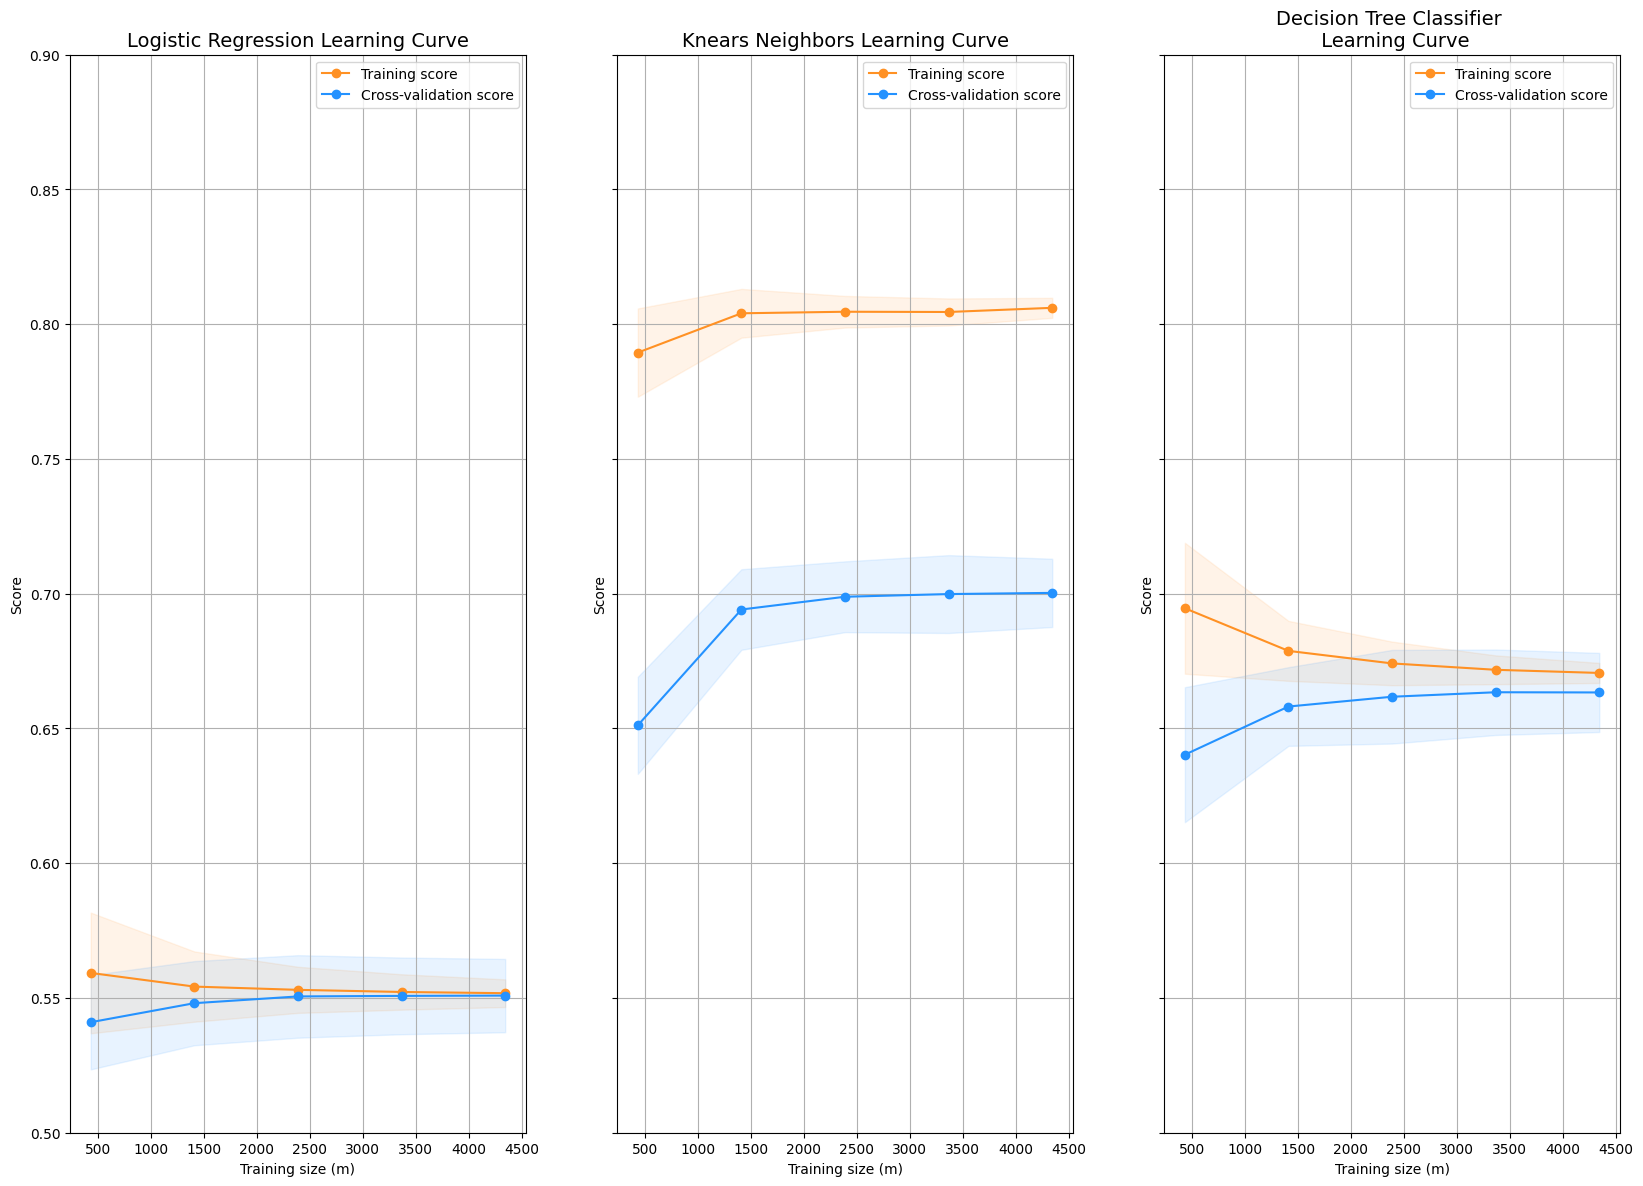

In [284]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, tree_clf, X_train, y_train, (0.5, 0.9), cv=cv, n_jobs=4)

#### Interpretation

Logistic Regression Learning Curve : the small gap with lower scores on both curves suggests high bias, indicating that the model is underfitting and may need more complexity or features to improve performance.

Knears Neighbors Learning Curve : The large gap suggests high variance, meaning the model is overfitting to the training data and may not generalize well to new data

Decision Tree Classifier Learning Curve : the small gap with high scores on both curves suggests low bias and variance, indicating a good model fit

In [282]:
Score

,LogisiticRegression,KNearest,DecisionTreeClassifier,RandomForestClassifier,Gradientboostingclassifier,AdaBoostClassifier,XGBClassifier,BaggingClassifier
C_validation,0.55,0.73,0.67,0.74,0.75,0.72,0.74,0.72
Precision,0.419426,0.699779,0.641648,0.724798,0.739514,0.70493,0.728477,0.710817
Erreur,0.80574,0.334069,0.412804,0.306107,0.281089,0.325975,0.296542,0.325975
MSE,0.80574,0.334069,0.412804,0.298749,0.281089,0.325975,0.296542,0.320088


**According to our results, the best model in our study with the best performance is the Gradientboostingclassifie with precision of 73%. This model is effective in addressing our problem.**